In [49]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [50]:
alpha = float(input('Select alpha parameter: '))
tf = float(input('Integrate up to time T= '))
ts = int(input('Number of time steps: '))

Select alpha parameter: 20
Integrate up to time T= 0.1
Number of time steps: 100


In [51]:
def u0(x):
    return np.sin(2*pi*x)


def a(x):
    return alpha/(1+x**2)



def s(t,x):
    return np.exp(-30*x**2)*(np.sin(t))**2



M = 50
x = np.linspace(-1,1,M+1)
h = 2/M
D2 = np.zeros([M-1,M-1])
D2 = np.diag(np.ones(M-2),-1) -2*np.diag(np.ones(M-1),0) + np.diag(np.ones(M-2),+1)
D2 = (1/h**2)*D2

D1 = np.zeros([M-1,M-1])
D1 = -np.diag(np.ones(M-2),-1) + np.diag(np.ones(M-2),+1)
D1 = (1/(2*h))*D1

In [52]:
k = tf/ts

t = np.linspace(0,tf,ts+1)
Un = u0(x[1:-1]) #da x_1 a X_{M-1}
#Un = u0(x)

In [53]:
deriv = np.zeros(M-1)
for i in range(1,M):
    deriv[i-1] = (a(x[i+1]) - a(x[i-1]))/(2*h)
#deriv

In [54]:
ufb = u0(-1)
usb = u0(1)
I = np.eye(M-1)
for n in range(ts):
    b = k*s(t[n+1],x[1:-1])
    b[0] = k*s(t[n+1],x[1]) + ufb*k*a(x[1])/(h**2) - k*ufb*(a(x[2])-a(x[0]))/(4*h**2) #nodo x_1
    b[-1] = k*s(t[n+1],x[M-1]) + usb*k*a(x[M-1])/(h**2)  + k*usb*(a(x[M])-a(x[M-2]))/(4*h**2) #nodo x_M-1
    
    #A = np.diag(a(x[1:-1]))@(D2@Un) + np.diag(D1@a(x[1:-1]))@(D1@Un)
    
    A = np.diag(a(x[1:-1]))@D2 + np.diag(deriv)@D1
    U = np.linalg.solve(I - k*A,Un + b)
    Un = U.copy()


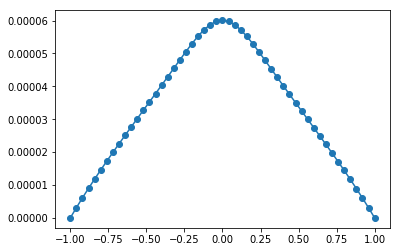

In [55]:
Ufinal = np.zeros(M+1)
Ufinal[0] = ufb
Ufinal[1:-1] = U
Ufinal[-1] = usb
plt.plot(x,Ufinal,'-o')
plt.show()

In [56]:
print(Ufinal)

[ 2.44929360e-16  3.10630724e-06  6.10269959e-06  9.00425795e-06
  1.18245007e-05  1.45755928e-05  1.72685366e-05  1.99133472e-05
  2.25192149e-05  2.50946554e-05  2.76476485e-05  3.01857619e-05
  3.27162440e-05  3.52460405e-05  3.77816163e-05  4.03283348e-05
  4.28889466e-05  4.54605628e-05  4.80295407e-05  5.05643165e-05
  5.30075995e-05  5.52711823e-05  5.72378576e-05  5.87740540e-05
  5.97530356e-05  6.00830242e-05  5.97304748e-05  5.87291280e-05
  5.71709606e-05  5.51829120e-05  5.28987655e-05  5.04359494e-05
  4.78829036e-05  4.52971624e-05  4.27105447e-05  4.01369583e-05
  3.75795645e-05  3.50358885e-05  3.25008411e-05  2.99682227e-05
  2.74313363e-05  2.48831549e-05  2.23162941e-05  1.97229061e-05
  1.70945425e-05  1.44220010e-05  1.16951602e-05  8.90280386e-06
  6.03243203e-06  3.07005964e-06 -2.44929360e-16]


In [57]:
I = np.eye(M-1)
Un = u0(x[1:-1])
for n in range(ts):
    bCN = 0.5*k*( s(t[n+1],x[1:-1]) + s(t[n],x[1:-1]) + np.diag(a(x[1:-1]))@(D2@Un) + np.diag(deriv)@(D1@Un) )
    Aun = np.diag(a(x[1:-1]))@(D2@Un) + np.diag(deriv)@(D1@Un)
    bCN[0] = 0.5*k*( s(t[n+1],x[1]) + s(t[n],x[1]) + 2*ufb*a(x[1])/(h**2) - 2*ufb*(a(x[2])-a(x[0]))/(4*h**2) + Aun[0] )#nodo x_1
    bCN[-1] = 0.5*k*( s(t[n+1],x[M-1]) + s(t[n],x[M-1])  + 2*usb*a(x[M-1])/(h**2)  + 2*usb*(a(x[M])-a(x[M-2]))/(4*h**2) +Aun[-1]) #nodo x_M-1
        
    
    ACN = np.diag(a(x[1:-1]))@D2 + np.diag(deriv)@D1
    UCN = np.linalg.solve(I - 0.5*k*ACN,Un + bCN)
    Un = UCN.copy()


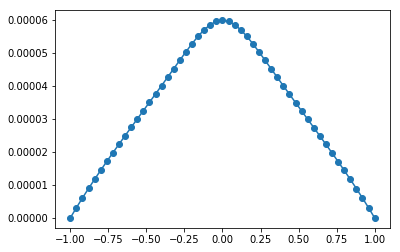

In [58]:
UfinalCN = np.zeros(M+1)
UfinalCN[0] = ufb
UfinalCN[1:-1] = UCN
UfinalCN[-1] = usb
plt.plot(x,UfinalCN,'-o')
plt.show()

In [59]:
if (ts>8000 and alpha < 5):
    tsrange = np.arange(200,500,50)
    uRifCN = UCN
    errCN = []
    for ts in tsrange:
        k = tf/ts
        t = np.linspace(0,tf,ts+1)
        I = np.eye(M-1)
        Un = u0(x[1:-1])
        for n in range(ts):
            bCN = 0.5*k*( s(t[n+1],x[1:-1]) + s(t[n],x[1:-1]) + np.diag(a(x[1:-1]))@(D2@Un) + np.diag(deriv)@(D1@Un) )
            Aun = np.diag(a(x[1:-1]))@(D2@Un) + np.diag(deriv)@(D1@Un)
            bCN[0] = 0.5*k*( s(t[n+1],x[1]) + s(t[n],x[1]) + 2*ufb*a(x[1])/(h**2) - 2*ufb*(a(x[2])-a(x[0]))/(4*h**2) + Aun[0] )#nodo x_1
            bCN[-1] = 0.5*k*( s(t[n+1],x[M-1]) + s(t[n],x[M-1])  + 2*usb*a(x[M-1])/(h**2)  + 2*usb*(a(x[M])-a(x[M-2]))/(4*h**2) +Aun[-1]) #nodo x_M-1
    
            A = np.diag(a(x[1:-1]))@D2 + np.diag(deriv)@D1
            UCN = np.linalg.solve(I - 0.5*k*A,Un + bCN)
            Un = UCN.copy()
    
        errCN.append(np.linalg.norm(UCN - uRifCN,np.Inf))

    
    plt.figure(figsize=(8,8))
    plt.loglog(tsrange, errCN, '-o', label='Crank Nicolson')
    plt.loglog(tsrange, errCN[-1] * tsrange[-1] / tsrange, '-', label='ordine 1')
    plt.loglog(tsrange, errCN[-1] * (tsrange[-1] / tsrange) ** 2, '-', label='order 2')
    plt.title('Crank Nicolson')
    plt.legend()
    plt.show()